In [5]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [6]:
df=pd.read_csv("Downloads/heart_v3.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            270 non-null    int64
 1   sex            270 non-null    int64
 2   BP             270 non-null    int64
 3   cholestrol     270 non-null    int64
 4   heart disease  270 non-null    int64
dtypes: int64(5)
memory usage: 10.7 KB


In [7]:
df.head()

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


In [8]:
df["heart disease"].value_counts()

0    150
1    120
Name: heart disease, dtype: int64

In [9]:
X=df.drop(columns="heart disease", axis=1)
y=df["heart disease"]

In [10]:
X

,age,sex,BP,cholestrol
0,70,1,130,322
1,67,0,115,564
2,57,1,124,261
3,64,1,128,263
4,74,0,120,269
...,...,...,...,...
265,52,1,172,199
266,44,1,120,263
267,56,0,140,294
268,57,1,140,192


In [11]:
y

0      1
1      0
2      1
3      0
4      0
      ..
265    0
266    0
267    0
268    0
269    1
Name: heart disease, Length: 270, dtype: int64

## Train Test Split

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train,X_test, y_train, y_test=train_test_split(X, y, train_size=0.7, random_state=42)

In [14]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((189, 4), (81, 4), (189,), (81,))

## Building a Decision Tree Model

In [15]:
from sklearn.tree import DecisionTreeClassifier

In [16]:
dt=DecisionTreeClassifier(max_depth=3)

In [17]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [18]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

In [19]:
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz

In [20]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


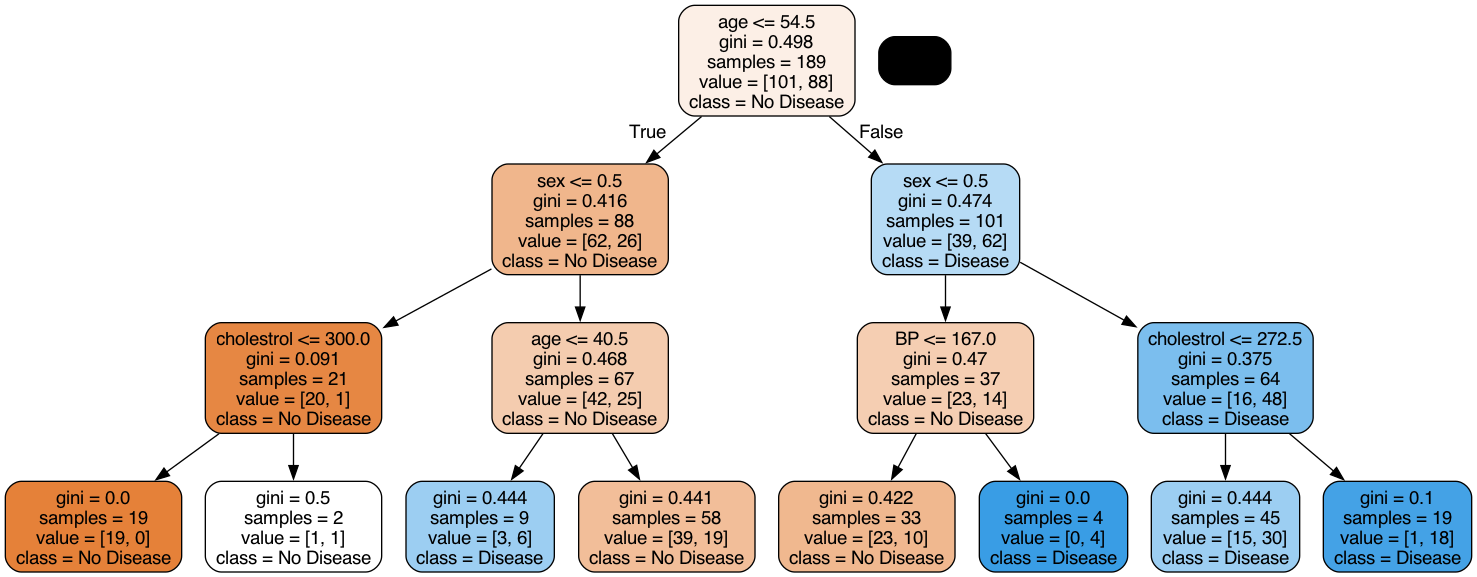

In [21]:
dot_data=StringIO()

export_graphviz(dt, out_file=dot_data, filled=True, rounded=True, feature_names=X.columns, class_names=["No Disease", "Disease"])

graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

## Evaluate Model

In [22]:
y_train_pred=dt.predict(X_train)
y_test_pred=dt.predict(X_test)

In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [24]:
print(accuracy_score(y_train, y_train_pred))
confusion_matrix(y_train, y_train_pred)

0.7407407407407407


array([[82, 19],
       [30, 58]])

#### Test Set performance

In [25]:
print(accuracy_score(y_test, y_test_pred))
confusion_matrix(y_test, y_test_pred)

0.6049382716049383


array([[35, 14],
       [18, 14]])

### Creating helper functions for plotting the graph and evaluating the model performance

In [26]:
def get_dt_graph(dt_classifier):
    
    dot_data=StringIO()

    export_graphviz(dt_classifier, out_file=dot_data, filled=True, rounded=True, feature_names=X.columns, class_names=["No Disease", "Disease"])

    graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
    
    return graph
    
    
    

    

In [29]:
def evaluate_model(dt_classifier):
    
    y_train_pred=dt_classifier.predict(X_train)
    y_test_pred=dt_classifier.predict(X_test)
    
    print("Train Set Performance")
    print(accuracy_score(y_train, y_train_pred))
    print(confusion_matrix(y_train, y_train_pred))
    
    print('-'*50)
    
    print("Test Set Performance")
    print(accuracy_score(y_test, y_test_pred))
    print(confusion_matrix(y_test, y_test_pred))

In [30]:
evaluate_model(dt)

Train Set Performance
0.7407407407407407
[[82 19]
 [30 58]]
--------------------------------------------------
Test Set Performance
0.6049382716049383
[[35 14]
 [18 14]]


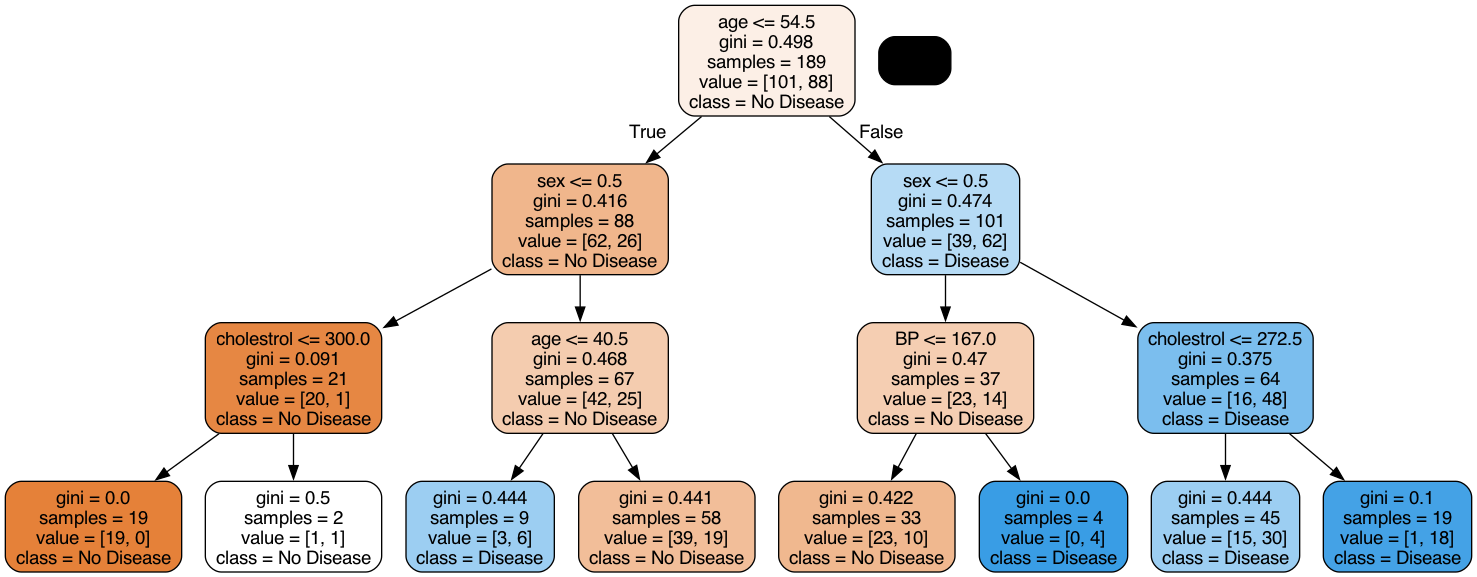

In [31]:
gph=get_dt_graph(dt)

Image(gph.create_png())

### DecisionTree without any Hyperparameter

In [35]:
dt_default=DecisionTreeClassifier(random_state=42)
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

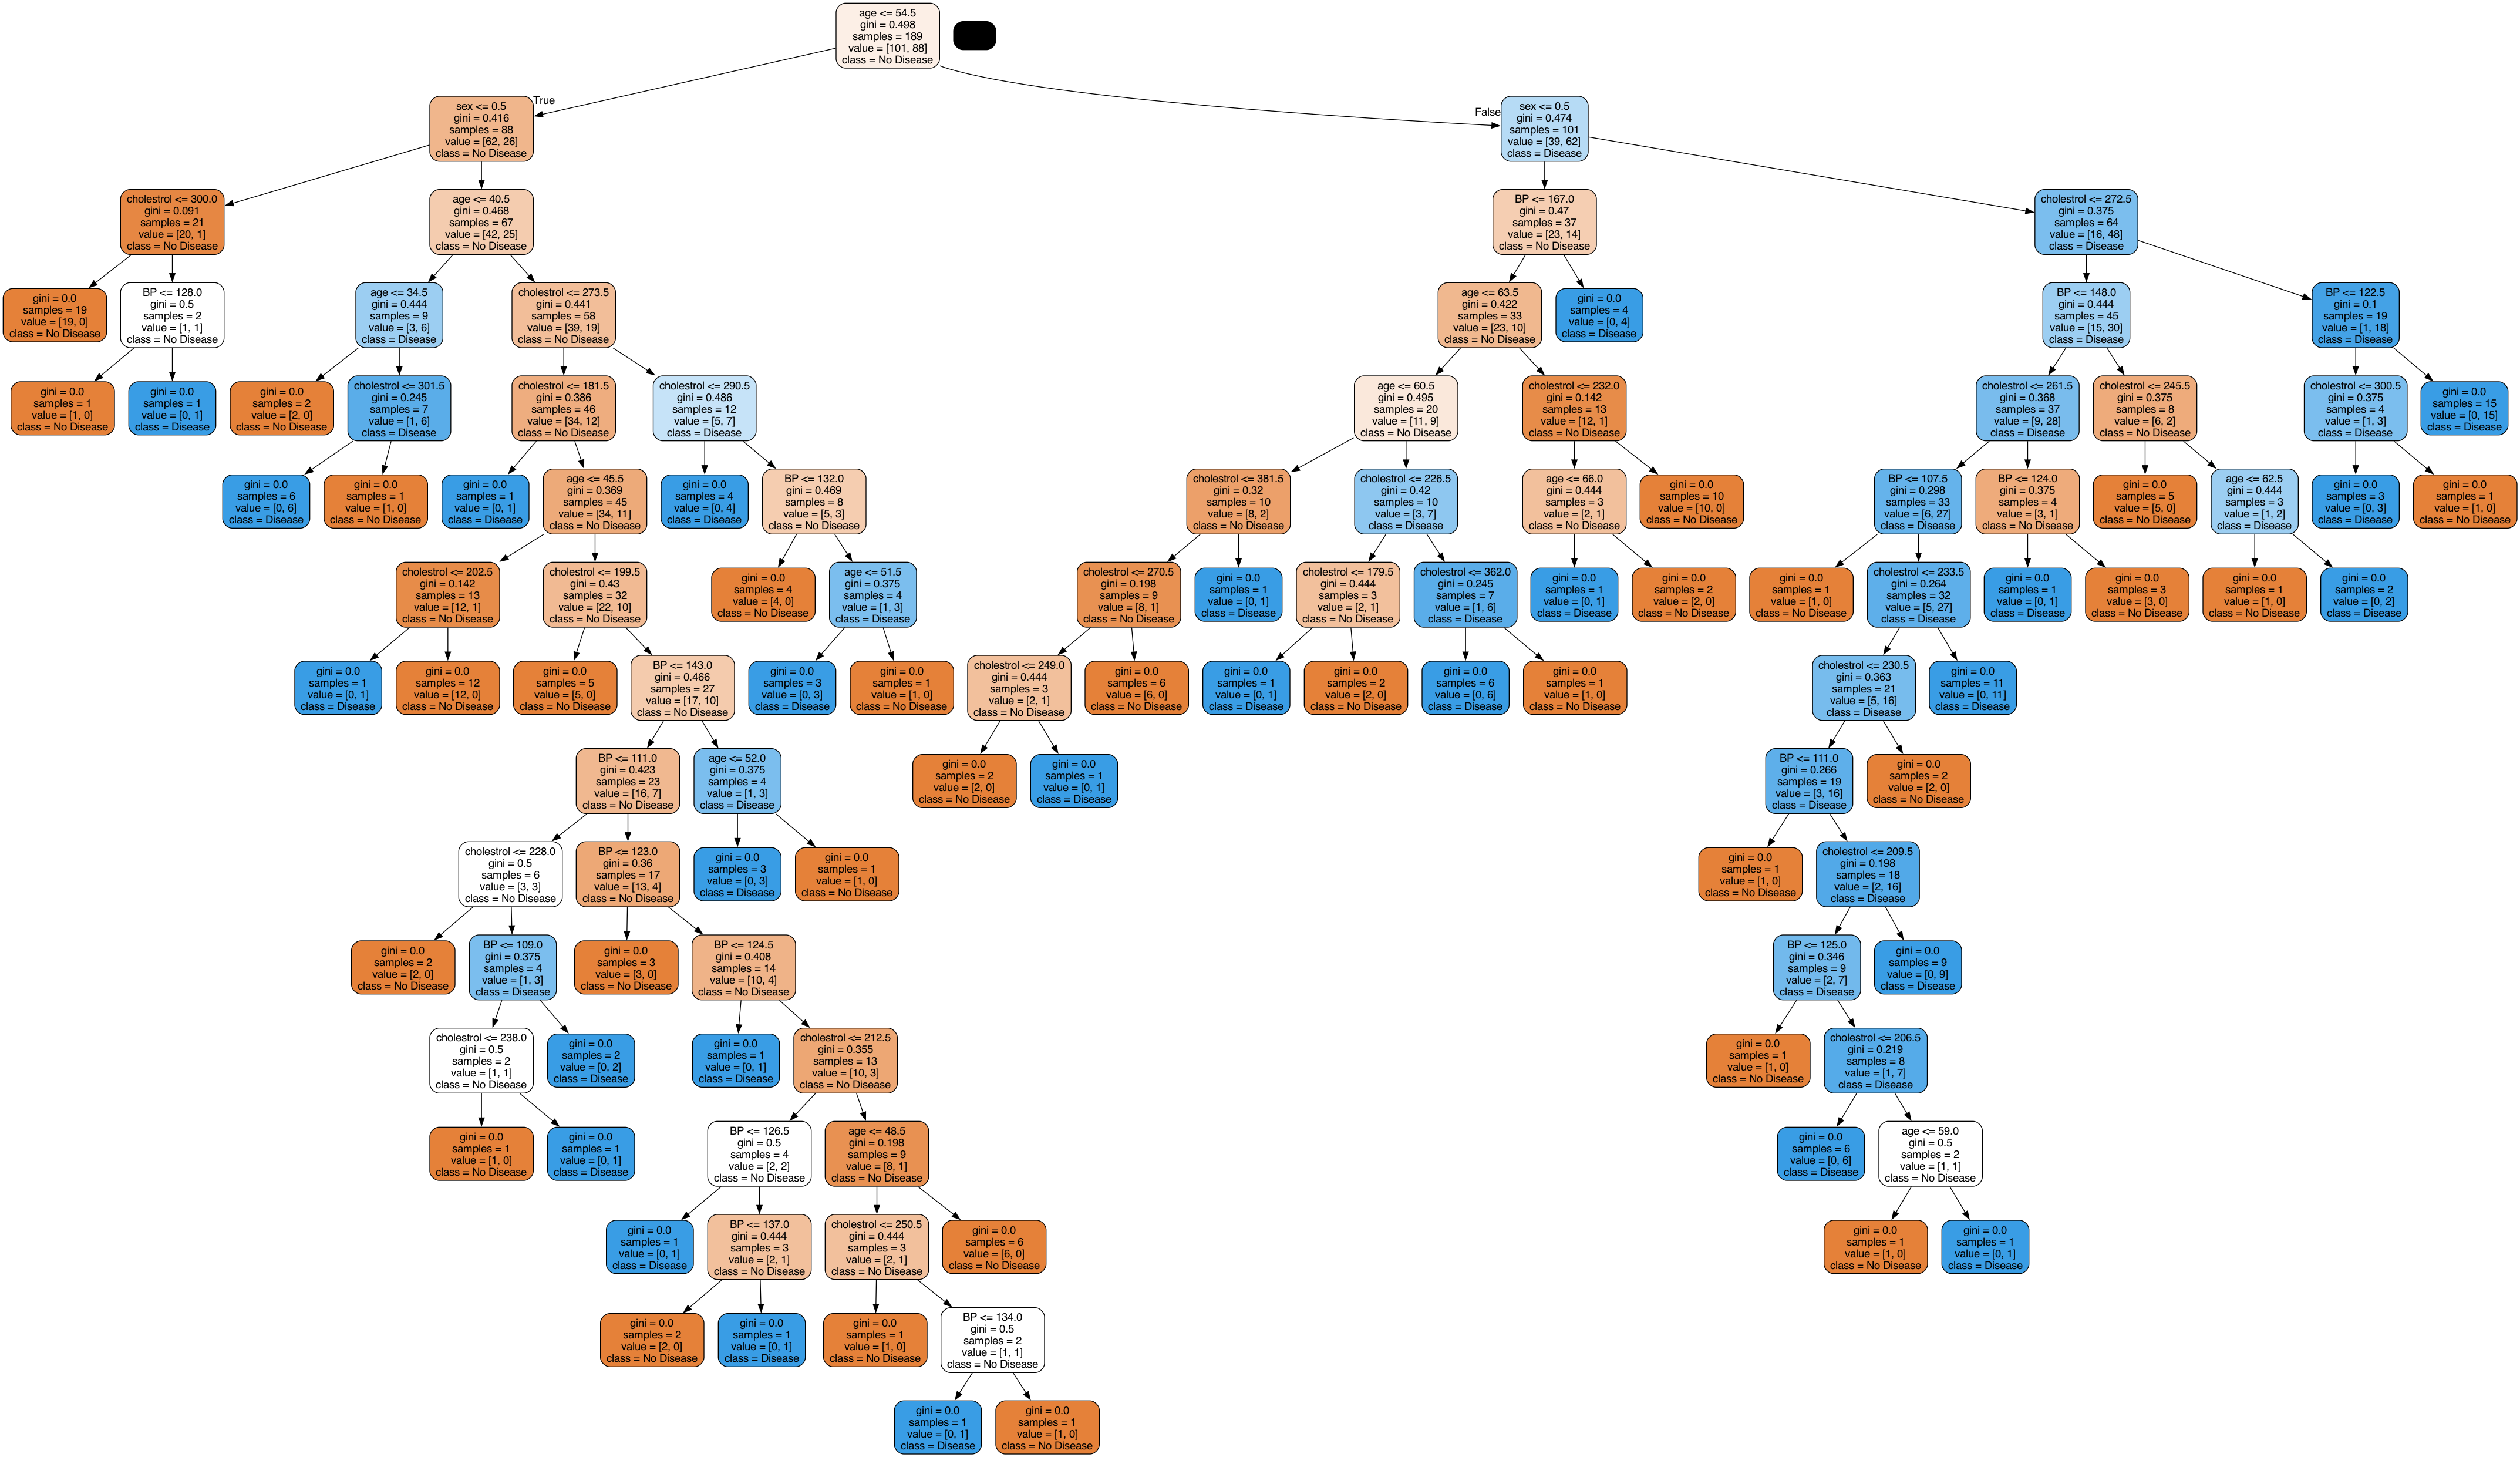

In [36]:
gph=get_dt_graph(dt_default)
Image(gph.create_png())

In [37]:
evaluate_model(dt_default)

Train Set Performance
1.0
[[101   0]
 [  0  88]]
--------------------------------------------------
Test Set Performance
0.6296296296296297
[[31 18]
 [12 20]]


Overfitting the data

### Controlling Depth of the Tree

In [42]:
dt_depth=DecisionTreeClassifier(max_depth=3, random_state=42)
dt_depth.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

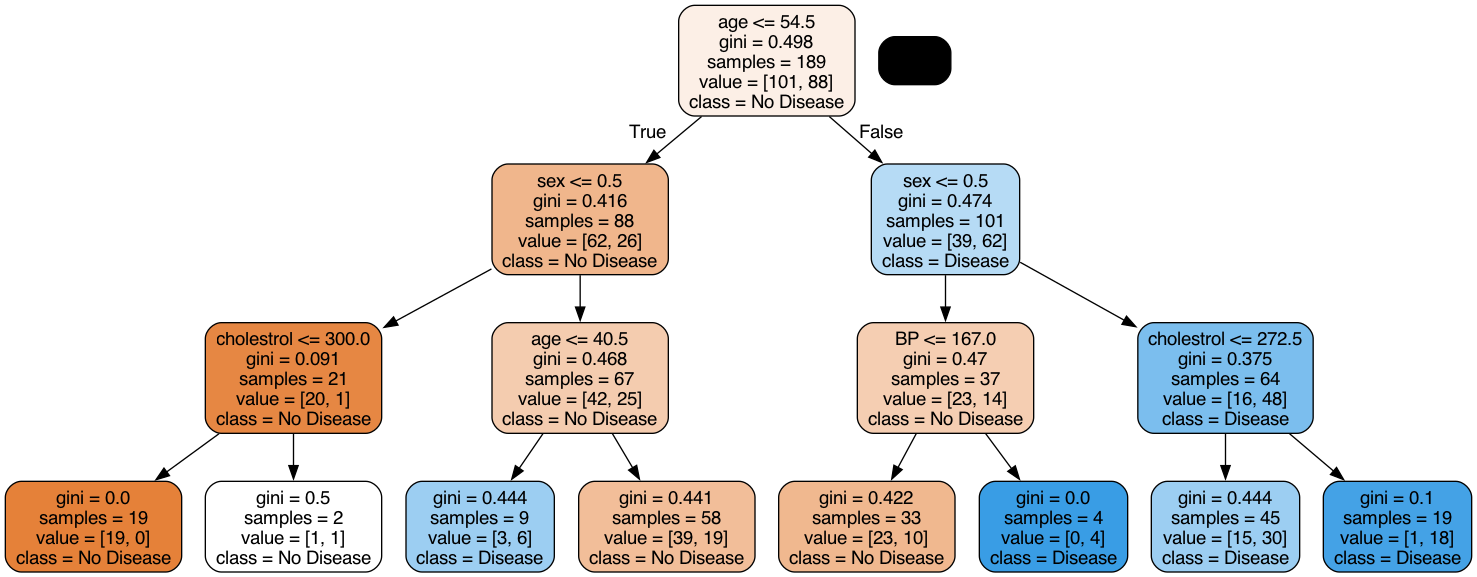

In [43]:
gph=get_dt_graph(dt_depth)
Image(gph.create_png())

In [44]:
evaluate_model(dt_depth)

Train Set Performance
0.7407407407407407
[[82 19]
 [30 58]]
--------------------------------------------------
Test Set Performance
0.6049382716049383
[[35 14]
 [18 14]]


### Specifying min samples before split 

In [45]:
dt_min_split=DecisionTreeClassifier(min_samples_split=20, random_state=42)
dt_min_split.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_split=20, random_state=42)

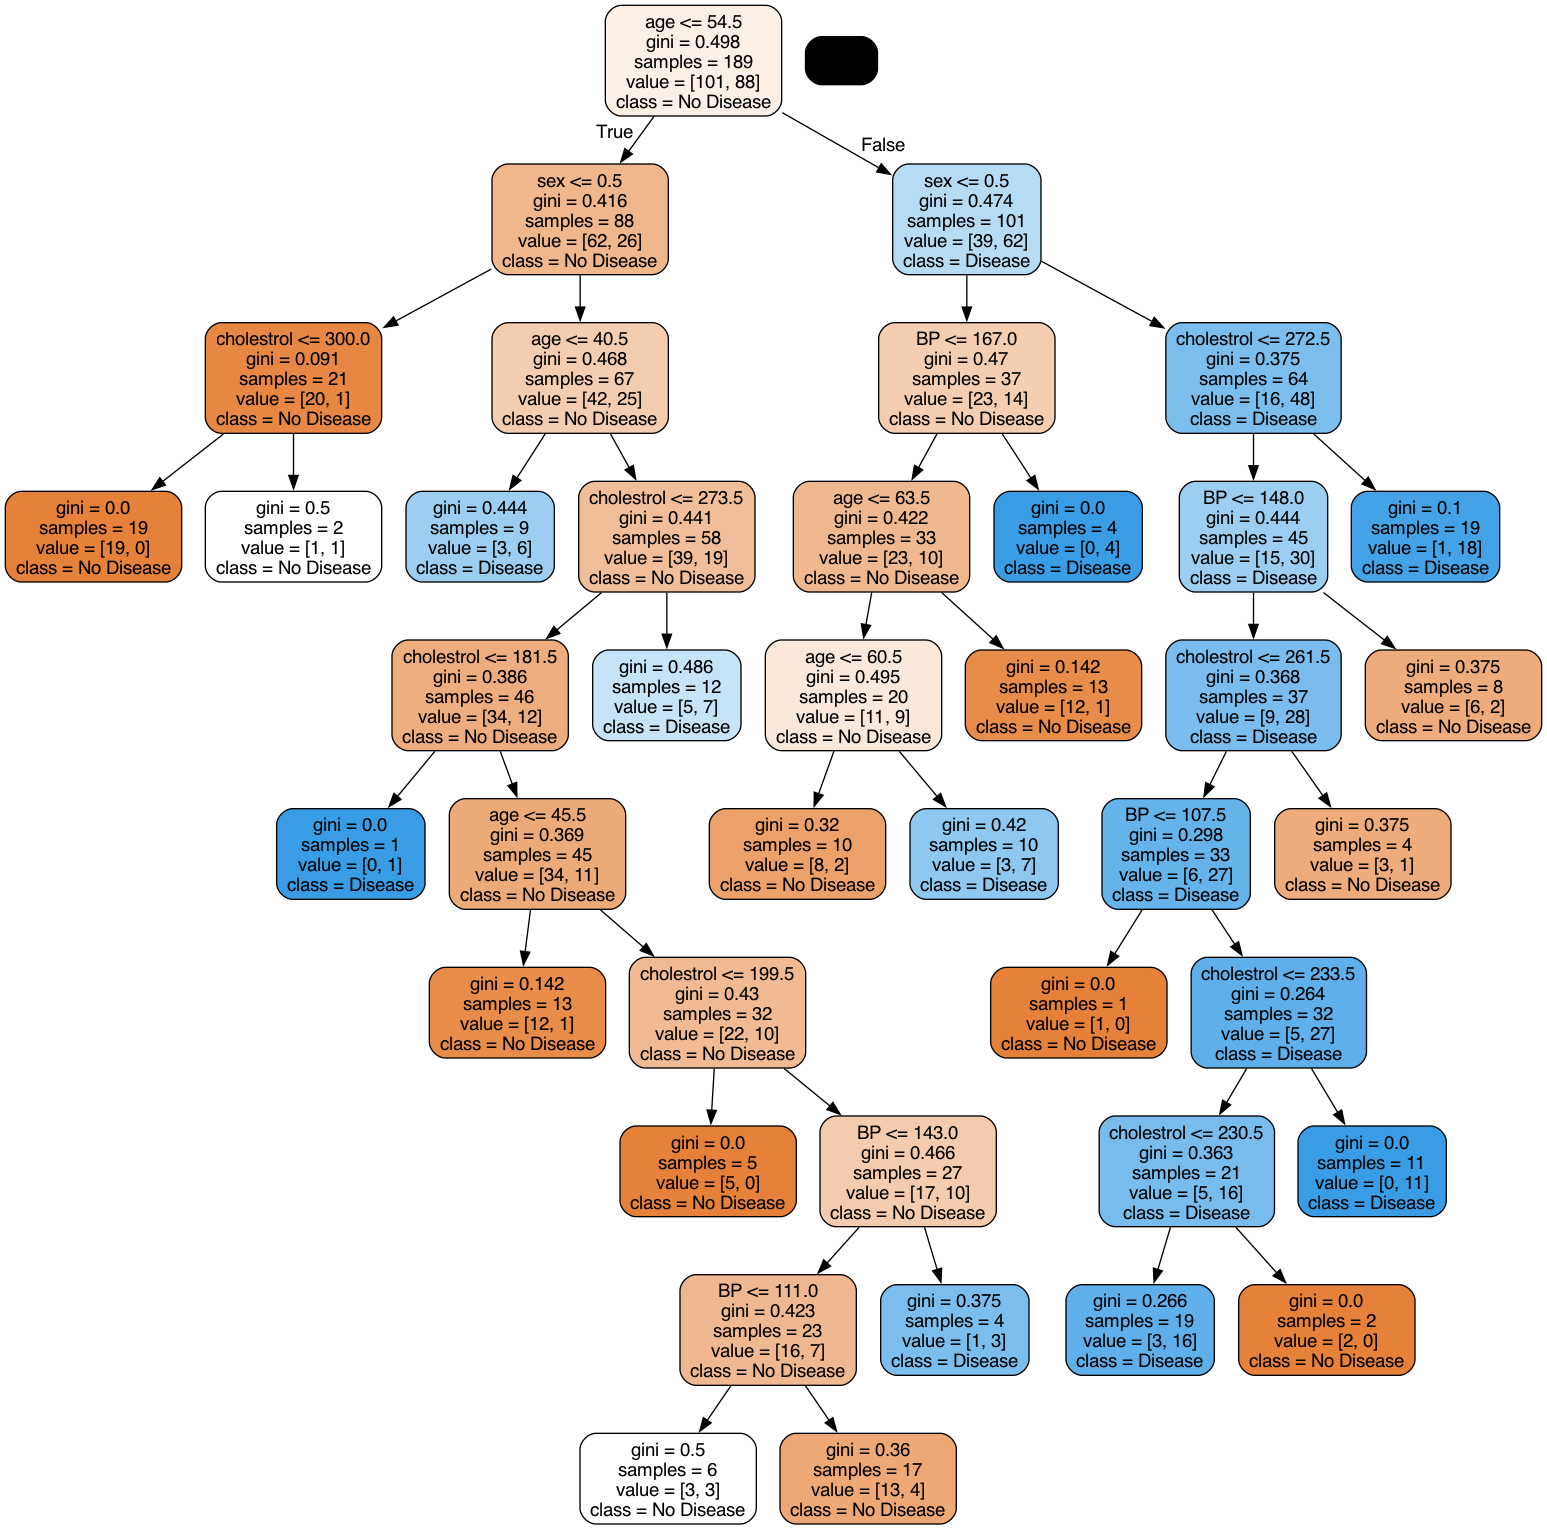

In [46]:
gph=get_dt_graph(dt_min_split)
Image(gph.create_png())

In [47]:
evaluate_model(dt_min_split)

Train Set Performance
0.8359788359788359
[[85 16]
 [15 73]]
--------------------------------------------------
Test Set Performance
0.6419753086419753
[[32 17]
 [12 20]]


### Specifying min samples in leaf node 

In [48]:
dt_min_leaf=DecisionTreeClassifier(min_samples_leaf=20, random_state=42)
dt_min_leaf.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=20, random_state=42)

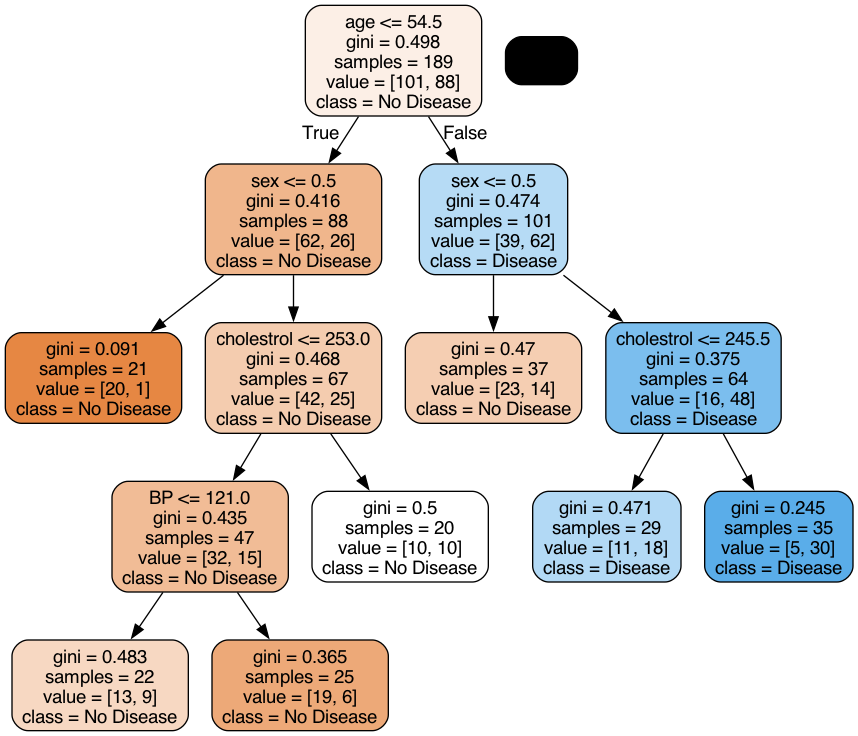

In [49]:
gph=get_dt_graph(dt_min_leaf)
Image(gph.create_png())

In [50]:
evaluate_model(dt_min_leaf)

Train Set Performance
0.7037037037037037
[[85 16]
 [40 48]]
--------------------------------------------------
Test Set Performance
0.6419753086419753
[[38 11]
 [18 14]]


### Using Entropy Instead of Gini 

In [51]:
dt_min_leaf_entropy=DecisionTreeClassifier(min_samples_leaf=20, random_state=42, criterion="entropy")
dt_min_leaf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=20,
                       random_state=42)

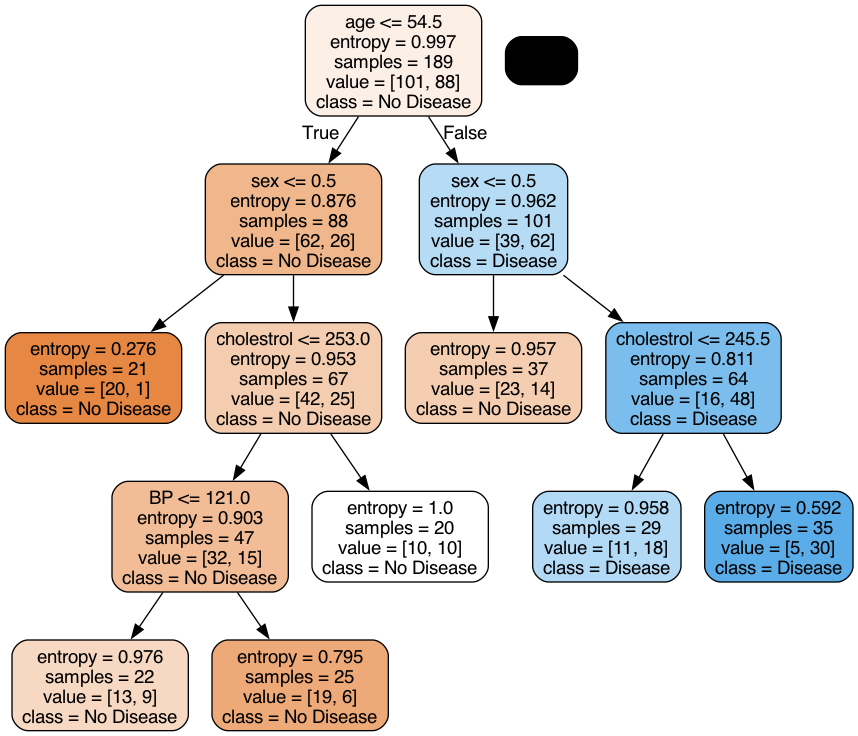

In [52]:
gph=get_dt_graph(dt_min_leaf_entropy)
Image(gph.create_png())

In [53]:
evaluate_model(dt_min_leaf_entropy)

Train Set Performance
0.7037037037037037
[[85 16]
 [40 48]]
--------------------------------------------------
Test Set Performance
0.6419753086419753
[[38 11]
 [18 14]]


### Hyperparameter tuning using  Grid Search CV

In [54]:
dt=DecisionTreeClassifier(random_state=42)

In [55]:
from sklearn.model_selection import GridSearchCV

In [57]:
params={
    'max_depth':[2,3,5,10,20],
    'min_samples_leaf':[5,10,20,50,100],
    'criterion':['Gini', 'entropy']
    
}

In [58]:
grid_search=GridSearchCV(estimator=dt,
             param_grid=params,
             cv=4,
             n_jobs=-1,
             verbose=1,
             scoring="accuracy"
             
             )

In [59]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits
CPU times: user 189 ms, sys: 125 ms, total: 314 ms
Wall time: 3.12 s


/Users/vamanyadav/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
100 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/vamanyadav/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/vamanyadav/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 969, in fit
    super().fit(
  File "/Users/vamanyadav/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 390, in fit
    criterion = CRITERIA_CLF[sel

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['Gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [66]:
cv_df=pd.DataFrame(grid_search.cv_results_)

In [67]:
cv_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004378,0.002433,0.0,0.0,Gini,2,5,"{'criterion': 'Gini', 'max_depth': 2, 'min_sam...",NaN,NaN,NaN,NaN,NaN,NaN,26
1,0.003175,0.000942,0.0,0.0,Gini,2,10,"{'criterion': 'Gini', 'max_depth': 2, 'min_sam...",NaN,NaN,NaN,NaN,NaN,NaN,28
2,0.003329,0.001583,0.0,0.0,Gini,2,20,"{'criterion': 'Gini', 'max_depth': 2, 'min_sam...",NaN,NaN,NaN,NaN,NaN,NaN,29
3,0.002537,0.002237,0.0,0.0,Gini,2,50,"{'criterion': 'Gini', 'max_depth': 2, 'min_sam...",NaN,NaN,NaN,NaN,NaN,NaN,30
4,0.001726,0.001229,0.0,0.0,Gini,2,100,"{'criterion': 'Gini', 'max_depth': 2, 'min_sam...",NaN,NaN,NaN,NaN,NaN,NaN,31


In [68]:
cv_df.nlargest(5, "mean_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
30,0.002403,0.000547,0.001255,0.000557,entropy,3,5,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.604167,0.765957,0.617021,0.680851,0.666999,0.064090,1
28,0.002314,0.000691,0.001827,0.000777,entropy,2,50,"{'criterion': 'entropy', 'max_depth': 2, 'min_...",0.666667,0.680851,0.574468,0.702128,0.656028,0.048751,2
33,0.002395,0.002263,0.001122,0.000886,entropy,3,50,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.666667,0.680851,0.574468,0.702128,0.656028,0.048751,2
38,0.001260,0.000060,0.000670,0.000045,entropy,5,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.666667,0.680851,0.574468,0.702128,0.656028,0.048751,2
43,0.001671,0.000242,0.000918,0.000241,entropy,10,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.666667,0.680851,0.574468,0.702128,0.656028,0.048751,2


In [69]:
grid_search.best_score_

0.6669991134751774

In [70]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=42)

In [71]:
dt_best=grid_search.best_estimator_

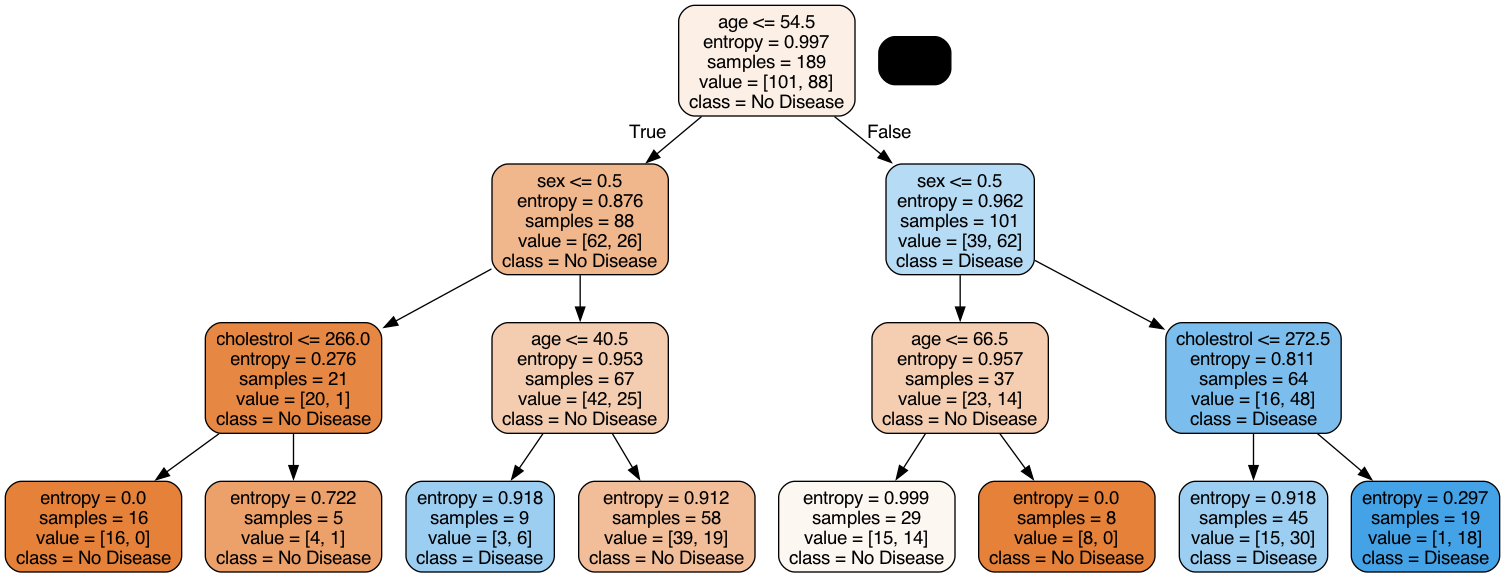

In [73]:
gph=get_dt_graph(dt_best)
Image(gph.create_png())

In [74]:
evaluate_model(dt_best)

Train Set Performance
0.7195767195767195
[[82 19]
 [34 54]]
--------------------------------------------------
Test Set Performance
0.6172839506172839
[[36 13]
 [18 14]]
